In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
curated_interesting = ['(3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid', 
                       '(3α,5β,12α,22E)-3,12-Dihydroxychol-22-en-24-oic acid',
           'Deoxycholic acid', 'Hyodeoxycholic acid', 'Cholic acid',  
           'Alanine conjugated cholic acid', 'Spectral Match to Tauroursodeoxycholic acid from NIST14',
                            'Taurodeoxycholic acid', 'LAUROYLCARNITINE', 'Tauro-b-muricholic acid',
           'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14', 
           'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14', 
          'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine from NIST14', 'Bilirubin', 
                      'Spectral Match to 1-Stearoyl-2-myristoyl-sn-glycero-3-phosphocholine from NIST14', 
                      'Spectral Match to Elaidic acid from NIST14', 'Coronaric acid']

#combined from calour and songbird/qurro
#(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-Trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid 
#              = cholic acid
# (4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid
#             = (3α,5α,6α,7β,12α)-3,6,7,12-Tetrahydroxycholan-24-oic acid
# (R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid 
#               = (3α,5β,12α,22E)-3,12-Dihydroxychol-22-en-24-oic acid

In [24]:
interested_molz = ['Tauro-b-muricholic acid', 'TRYPTOPHAN', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14', 
                   'LAUROYLCARNITINE', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14', 
                  'Ursodeoxycholic acid']

# IHC Experiment

In [25]:
ihc_metab_md = pd.read_table('../data/Metabolome/longIHC_metab_metadata_cleaned.txt', sep='\t', index_col=0)
ihc_metab_md

,filename,micro-sample-id,cage_food_consumption_g,cage_location,cage_number,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
sample-id,,,,,,,,,,,,,,,
A15_85_01,A15_85_01.mzXML,11548.A15.85.1,not applicable,On shelf,A15,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 85,26.5,g,85,feces
A15_85_02,A15_85_02.mzXML,11548.A15.85.2,56.6,On shelf,A15,Regular chow,Air,ApoE KO,10.5,weeks,Mouse 85,26.7,g,85,feces
A15_85_03,A15_85_03.mzXML,11548.A15.85.3,85.9,On shelf,A15,Regular chow,Air,ApoE KO,11.0,weeks,Mouse 85,27.2,g,85,feces
A15_85_04,A15_85_04.mzXML,11548.A15.85.4,59.3,On shelf,A15,Regular chow,Air,ApoE KO,11.5,weeks,Mouse 85,27.4,g,85,feces
A15_85_05,A15_85_05.mzXML,11548.A15.85.5,81,On shelf,A15,Regular chow,Air,ApoE KO,12.0,weeks,Mouse 85,27.6,g,85,feces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Blank_G1_5uL_PreTP15_01,Blank_G1_5uL_PreTP15_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,not applicable,not applicable
Blank_G1_5uL_PreTP15_02,Blank_G1_5uL_PreTP15_02.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,not applicable,not applicable
Blank_G1_5uL_PreTP20_01,Blank_G1_5uL_PreTP20_01.mzXML,not applicable,Not provided,not applicable,not applicable,not applicable,not applicable,not applicable,0.0,weeks,not applicable,Not provided,not applicable,not applicable,not applicable


In [26]:
ihc_metab_mols = pd.read_table('../data/Metabolome/longIHC_allunique_noblanks_relfreq.txt', sep='\t', index_col=0)
ihc_metab_mols.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,a-Muricholic acid,alpha-TOCHOPHERYL ACETATE,b-Muricholic acid,cordycepin,hyocholic acid,"methyl (4R)-4-((3R,5S,7R,9S,10S,13R,15R,17R)-3,7,15-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoate",sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,tauroursodeoxycholic acid
A15_85_15,0.008588,0.000862,0.006151,0.015101,0.016464,0.061358,0.034855,0.026011,0.000059,0.013372,...,0.040514,0.0,0.043981,0.042551,0.001493,0.023498,0.086663,0.001727,0.000421,0.000000
A15_86_01,0.007044,0.022056,0.010572,0.019103,0.041065,0.182771,0.135433,0.117675,0.000081,0.040236,...,0.254319,0.0,0.525776,0.124233,0.010321,0.166251,0.040021,0.002238,0.006039,0.000092
A15_86_15,0.007671,0.000271,0.001471,0.008001,0.029983,0.027987,0.010048,0.041472,0.000070,0.014825,...,0.434414,0.0,0.049060,0.047262,0.005980,0.017559,0.102026,0.001359,0.000077,0.000000
A15_85_10,0.029511,0.001672,0.006419,0.008232,0.008480,0.028726,0.033301,0.067106,0.000000,0.022357,...,0.137931,0.0,0.136383,0.063552,0.000293,0.024302,0.031060,0.000465,0.000429,0.000000
A15_86_10,0.007590,0.000188,0.006027,0.011919,0.025891,0.013471,0.009704,0.078954,0.000165,0.027284,...,0.224543,0.0,0.085288,0.038982,0.000783,0.019783,0.037809,0.000477,0.000533,0.000000


In [27]:
ihc_metab_mols = ihc_metab_mols.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

In [28]:
ihc_mols_relfreq = pd.merge(ihc_metab_mols, ihc_metab_md, left_index=True, right_index=True)
ihc_mols_relfreq.head()

,"(2S,3S,4S,5R,6R)-6-[[(3S,4S,6aR,6bS,8aR,9R,12aS,14bR)-9-hydroxy-4-(hydroxymethyl)-4,6a,6b,8a,11,11,14b-heptamethyl-1,2,3,4a,5,6,7,8,9,10,12,12a,14,14a-tetradecahydropicen-3-yl]oxy]-5-[(2S,3R,4S,5R,6R)-4,5-dihydroxy-6-(hydroxymethyl)-3-[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxyoxan-2-yl]oxy-3,4-dihydroxyoxane-2-carboxylic acid","(2S,4R)-4-((3R,5S,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)-2-hydroxypentanoic acid","(4R)-4-((1R,3S,5S,7R,9S,10S,12S,13R,14S,17R)-1,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6R,7S,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4aR,5S)-9,9a-dihydroxy-3,4a,5-trimethyl-5,6,7,8,8a,9-hexahydro-4H-benzo[f][1]benzofuran-2-one","(R)-4-((3R,5R,8R,9S,10S,12S,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pent-2-enoic acid",...,diet,exposure_type,genotype,host_age,host_age_units,host_subject_id,host_weight,host_weight_units,mouse_number,sample_type
A15_85_15,0.008588,0.000862,0.006151,0.015101,0.016464,0.061358,0.034855,0.026011,0.000059,0.013372,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 85,30.5,g,85,feces
A15_86_01,0.007044,0.022056,0.010572,0.019103,0.041065,0.182771,0.135433,0.117675,0.000081,0.040236,...,Regular chow,Air,ApoE KO,10.0,weeks,Mouse 86,27,g,86,feces
A15_86_15,0.007671,0.000271,0.001471,0.008001,0.029983,0.027987,0.010048,0.041472,0.000070,0.014825,...,Regular chow,Air,ApoE KO,17.0,weeks,Mouse 86,28.4,g,86,feces
A15_85_10,0.029511,0.001672,0.006419,0.008232,0.008480,0.028726,0.033301,0.067106,0.000000,0.022357,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 85,28.7,g,85,feces
A15_86_10,0.007590,0.000188,0.006027,0.011919,0.025891,0.013471,0.009704,0.078954,0.000165,0.027284,...,Regular chow,Air,ApoE KO,14.5,weeks,Mouse 86,27.9,g,86,feces


In [29]:
ihc_mols_relfreq_renamed = ihc_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected
#conjugated Lineoleic acid - CLA - fermented foods - Bryn

In [110]:
molelist = ['TbMCA', 'Tryptophan', 'PC_18_0_18_1', 'Lauroylcarnitine', 'LysoPE_18_0', 'UDCA']

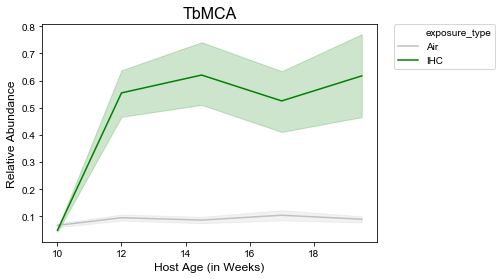

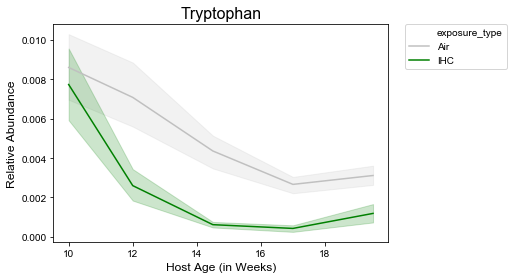

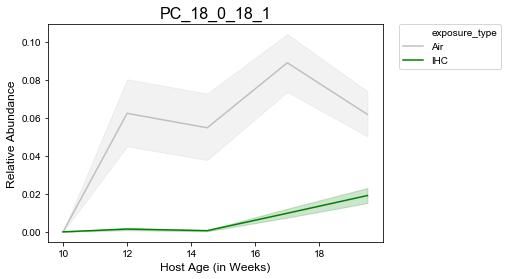

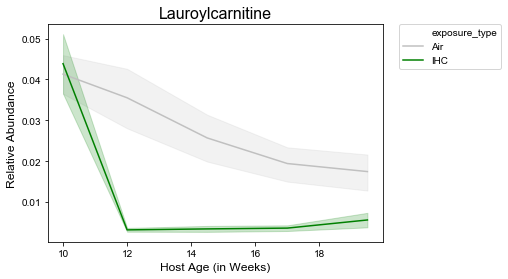

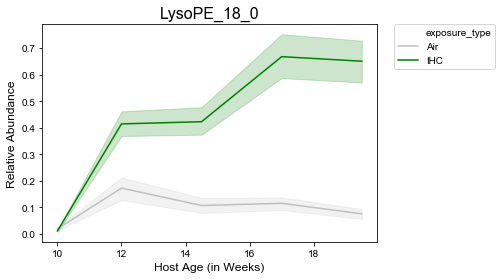

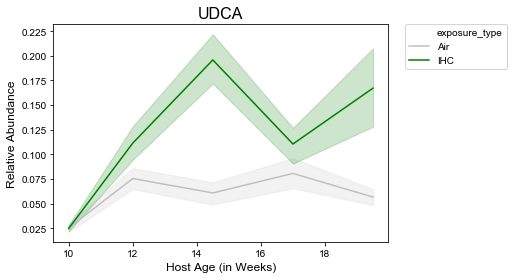

DataError: No numeric types to aggregate

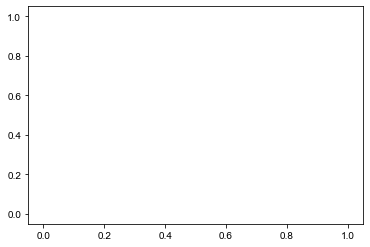

In [137]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['silver', 'green'], data=ihc_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IHC/longIHC_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

# IH_IC Experiment

In [71]:
ihic_metab_md = pd.read_table('../data/Metabolome/Haddad_IH_IC_MetaData.txt', sep='\t', index_col=0)
ihic_metab_md.head()

,qiita_name,age_units,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,collection_timestamp,description,diet,...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
sample-id,,,,,,,,,,,,,,,,,,,,,
A34_135_1,11829.A34.135.1,weeks,A34.135.1,Not applicable,On shelf,NaN,A34,4/3/18 12:00,Mouse 135 baseline stool collection 1 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_10,11829.A34.135.10,weeks,A34.135.10,18,On shelf,NaN,A34a,5/4/18 12:00,Mouse 135 stool collection 10 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_11,11829.A34.135.11,weeks,A34.135.11,23.9,On shelf,NaN,A34a,5/8/18 12:00,Mouse 135 stool collection 11 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_12,11829.A34.135.12,weeks,A34.135.12,17.4,On shelf,NaN,A34a,5/11/18 12:00,Mouse 135 stool collection 12 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_135_13,11829.A34.135.13,weeks,A34.135.13,23.1,On shelf,NaN,A34a,5/15/18 12:00,Mouse 135 stool collection 13 of 21,Regular chow,...,Mouse 135,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [72]:
ihic_metab_mols = pd.read_table('../data/Metabolome/longIHIC_allunique_noblanks_relfreq.txt', sep='\t', index_col=0)
ihic_metab_mols.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,gmelinol,hyocholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurohyodeoxycholic acid,threonine conjugated cholic acid,xanthohumol
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,0.002040,0.178099,0.097386,0.008264,0.003788,0.104363,0.016469,0.003787,0.000182,0.031576
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,0.001904,0.264515,0.162340,0.005174,0.008293,0.022904,0.026090,0.003635,0.000866,0.010885
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,0.005439,0.215188,0.129330,0.008907,0.008088,0.079875,0.018518,0.003721,0.000255,0.014142
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,0.000458,0.117326,0.032199,0.103328,0.003485,0.122591,0.008691,0.001066,0.000208,0.046962
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,0.000105,0.113387,0.015561,0.149509,0.002818,0.090604,0.011704,0.002739,0.000202,0.043920


In [73]:
ihic_metab_mols = ihic_metab_mols.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

In [74]:
ihic_mols_relfreq = pd.merge(ihic_metab_mols, ihic_metab_md, left_index=True, right_index=True)
ihic_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


## IH vs Air

In [36]:
ih_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'IC'].copy()
ih_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [37]:
ih_mols_relfreq_renamed = ih_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected

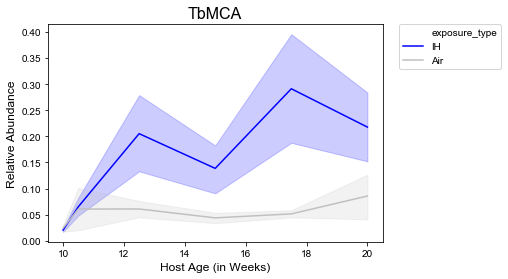

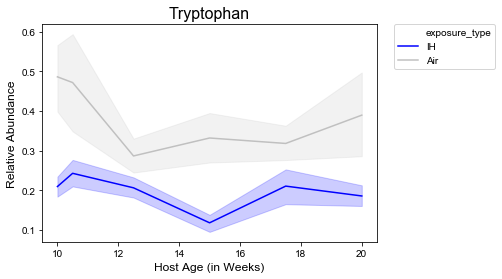

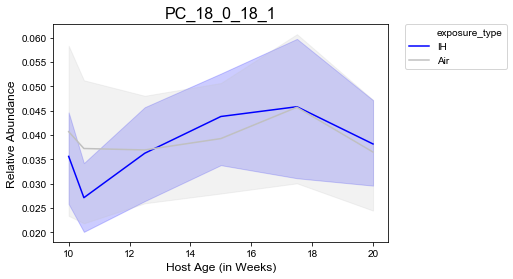

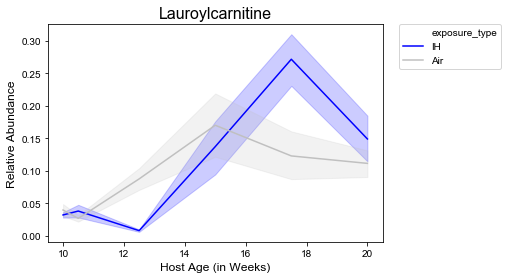

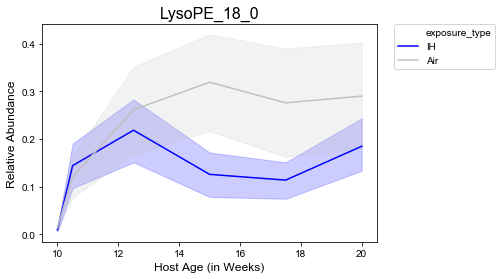

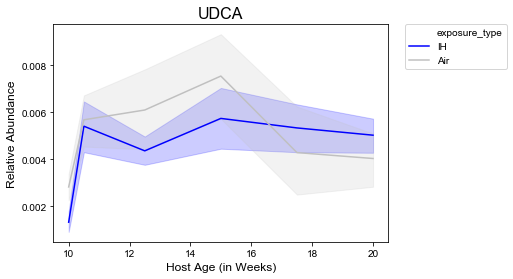

In [38]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['blue', 'silver'], data=ih_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IH/longIH_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

## IC vs Air

In [39]:
ic_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'IH'].copy()
ic_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,Mouse 139,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_1,0.211617,0.096118,0.014691,0.025868,0.036984,0.025248,0.018163,0.054607,0.000234,0.063091,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_140_16,0.019048,0.088095,0.040053,0.005825,0.001919,0.003215,0.008779,0.033513,0.000000,0.053422,...,Mouse 140,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A34_137_6,0.094519,0.039315,0.009653,0.016505,0.009641,0.064517,0.017036,0.033552,0.000000,0.058717,...,Mouse 137,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A35_142_16,0.013941,0.008918,0.002311,0.000282,0.004075,0.005210,0.002843,0.026978,0.000000,0.066491,...,Mouse 142,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [40]:
ic_mols_relfreq_renamed = ic_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})
#the UDCA and DCA chosen were the level 1 IDs, other level 2 IDs exist. 1/2 of the Tryptophan IDs was selected

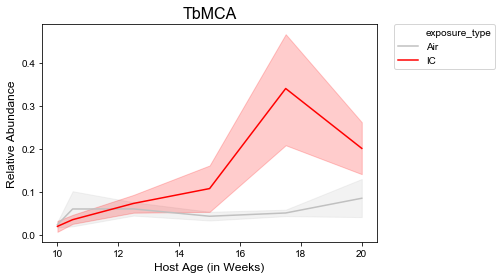

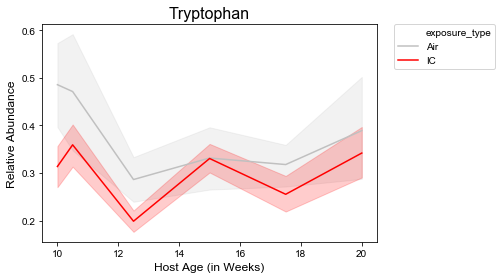

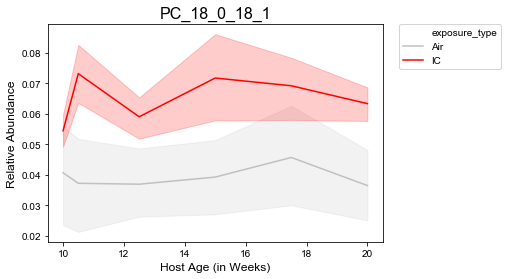

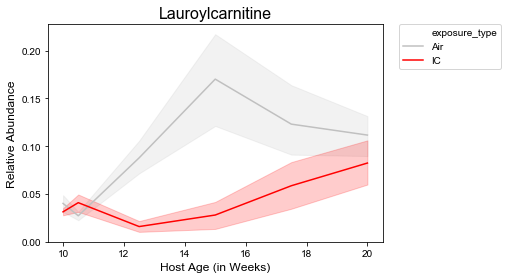

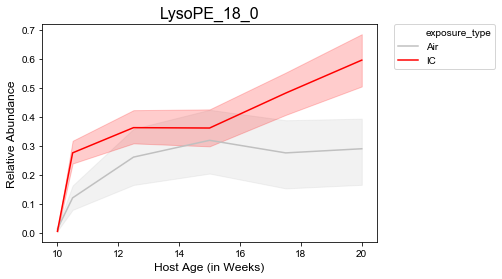

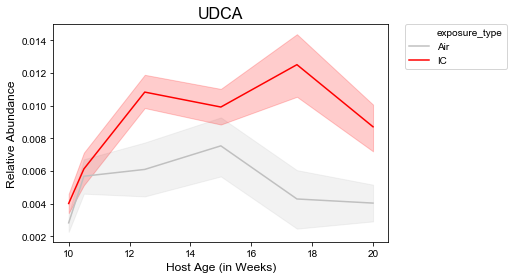

In [41]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['silver', 'red'], data=ic_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/IC/longIC_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

## IH vs IC

In [42]:
noAir_mols_relfreq = ihic_mols_relfreq[ihic_mols_relfreq['exposure_type'] != 'Air'].copy()
noAir_mols_relfreq.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,mouse_number,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,Mouse 144,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,Mouse 145,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g
A36_146_11,0.284601,0.313478,0.905295,0.042718,0.054074,0.027060,0.119232,0.176492,0.000711,0.000820,...,Mouse 146,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g


In [43]:
noAir_mols_relfreq_renamed = noAir_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

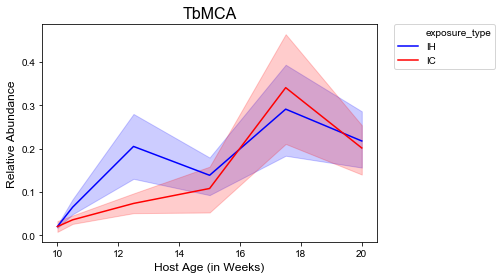

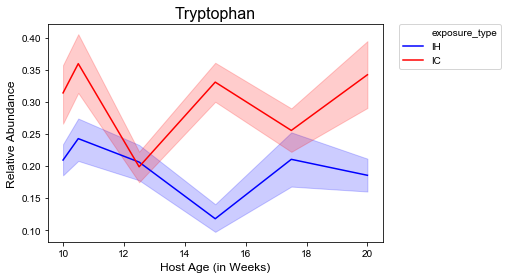

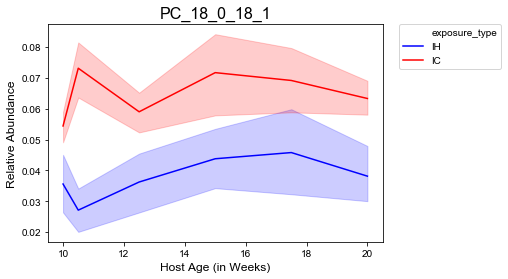

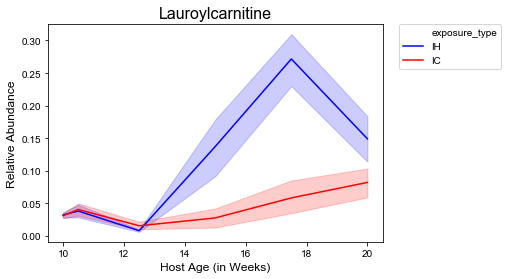

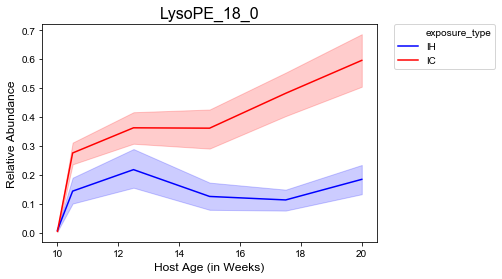

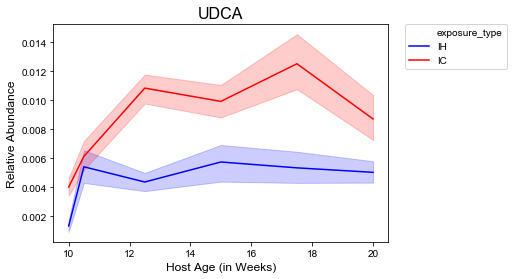

In [44]:
for mol in molelist:
    g = sns.lineplot(x='host_age', y=mol, hue='exposure_type', ci=68, 
                     palette=['blue', 'red'], data=noAir_mols_relfreq_renamed)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(mol, fontsize=16)
    plt.ylabel('Relative Abundance', fontsize=12)
    plt.xlabel('Host Age (in Weeks)', fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('../figures/noAir/long_noAir_metab_SEM_%s.svg' % mol, dpi=300, bbox_inches = "tight")
    plt.show()

# Heatmap to help figure it out

In [67]:
ihc_mols_relfreq_renamed['new_index'] = ihc_mols_relfreq_renamed['exposure_type'].astype(str) + '_' + ihc_mols_relfreq_renamed['host_age'].astype(str)
molelist2 = molelist
molelist2.append('new_index')
IHC_hm = ihc_mols_relfreq_renamed[molelist2].copy()
IHC_hm.set_index('new_index', inplace=True)
IHC_hm

,TbMCA,Tryptophan,PC_18_0_18_1,Lauroylcarnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_17.0,0.050062,0.007186,0.147563,0.058404,0.028671,0.007704
Air_10.0,0.184368,0.002724,0.000000,0.004325,0.047932,0.039081
Air_17.0,0.027795,0.005950,0.110457,0.041379,0.003308,0.025568
Air_14.5,0.035281,0.005598,0.000000,0.011761,0.013314,0.013344
Air_14.5,0.016230,0.009935,0.000000,0.045569,0.001877,0.018887
...,...,...,...,...,...,...
Air_17.0,0.142230,0.001275,0.076232,0.006942,0.409174,0.069689
Air_10.0,0.097773,0.001350,0.000000,0.072362,0.047200,0.017185
Air_19.5,0.150975,0.000419,0.047128,0.000736,0.034331,0.161330


In [68]:
IHC_hm2 = IHC_hm.groupby(IHC_hm.index, axis=0).mean()
IHC_hm2

,TbMCA,Tryptophan,PC_18_0_18_1,Lauroylcarnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_10.0,0.067153,0.008604,0.000027,0.041281,0.018897,0.025206
Air_12.0,0.095374,0.007083,0.062386,0.035492,0.172369,0.075376
Air_14.5,0.086620,0.004362,0.054775,0.025662,0.106969,0.060758
Air_17.0,0.104560,0.002666,0.088990,0.019397,0.115184,0.080573
Air_19.5,0.089906,0.003117,0.061822,0.017428,0.075540,0.056556
IHC_10.0,0.048938,0.007737,0.000006,0.043843,0.010914,0.024642
IHC_12.0,0.554446,0.002603,0.001482,0.003152,0.414337,0.111312
IHC_14.5,0.620109,0.000620,0.000634,0.003391,0.422593,0.195848
IHC_17.0,0.524957,0.000429,0.009806,0.003587,0.667710,0.110483


In [69]:
new_order = ['Air_10.0', 'Air_12.0', 'Air_14.5', 'Air_17.0', 'Air_19.5', 
             'IHC_10.0', 'IHC_12.0', 'IHC_14.5', 'IHC_17.0', 'IHC_19.5']
IHC_hm3 = IHC_hm2.reindex(new_order)
IHC_hm3

,TbMCA,Tryptophan,PC_18_0_18_1,Lauroylcarnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_10.0,0.067153,0.008604,0.000027,0.041281,0.018897,0.025206
Air_12.0,0.095374,0.007083,0.062386,0.035492,0.172369,0.075376
Air_14.5,0.086620,0.004362,0.054775,0.025662,0.106969,0.060758
Air_17.0,0.104560,0.002666,0.088990,0.019397,0.115184,0.080573
Air_19.5,0.089906,0.003117,0.061822,0.017428,0.075540,0.056556
IHC_10.0,0.048938,0.007737,0.000006,0.043843,0.010914,0.024642
IHC_12.0,0.554446,0.002603,0.001482,0.003152,0.414337,0.111312
IHC_14.5,0.620109,0.000620,0.000634,0.003391,0.422593,0.195848
IHC_17.0,0.524957,0.000429,0.009806,0.003587,0.667710,0.110483


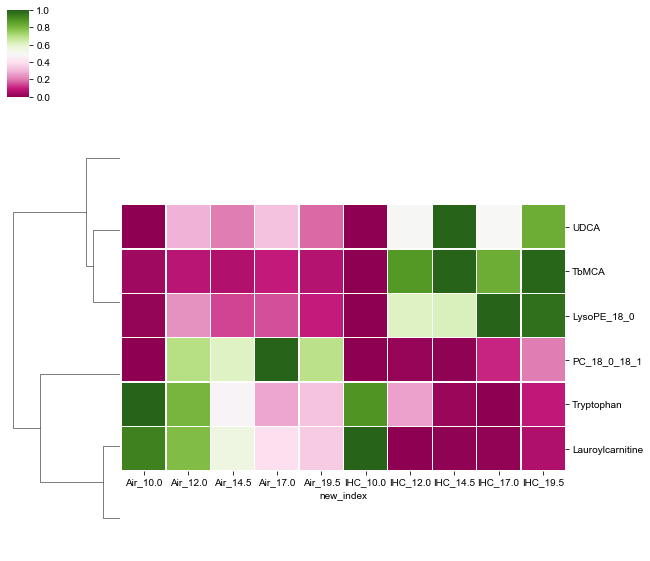

In [70]:
ax = sns.clustermap(IHC_hm3.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, square=True)
#plt.axvline(2, linewidth=3, c='k')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_heatmap.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [126]:
norder = ['Tryptophan', 'Lauroylcarnitine', 'PC_18_0_18_1', 'UDCA', 'LysoPE_18_0', 'TbMCA']

In [127]:
IHC_hm4 = IHC_hm3[norder]
IHC_hm4

,Tryptophan,Lauroylcarnitine,PC_18_0_18_1,UDCA,LysoPE_18_0,TbMCA
new_index,,,,,,
Air_10.0,0.008604,0.041281,0.000027,0.025206,0.018897,0.067153
Air_12.0,0.007083,0.035492,0.062386,0.075376,0.172369,0.095374
Air_14.5,0.004362,0.025662,0.054775,0.060758,0.106969,0.086620
Air_17.0,0.002666,0.019397,0.088990,0.080573,0.115184,0.104560
Air_19.5,0.003117,0.017428,0.061822,0.056556,0.075540,0.089906
IHC_10.0,0.007737,0.043843,0.000006,0.024642,0.010914,0.048938
IHC_12.0,0.002603,0.003152,0.001482,0.111312,0.414337,0.554446
IHC_14.5,0.000620,0.003391,0.000634,0.195848,0.422593,0.620109
IHC_17.0,0.000429,0.003587,0.009806,0.110483,0.667710,0.524957


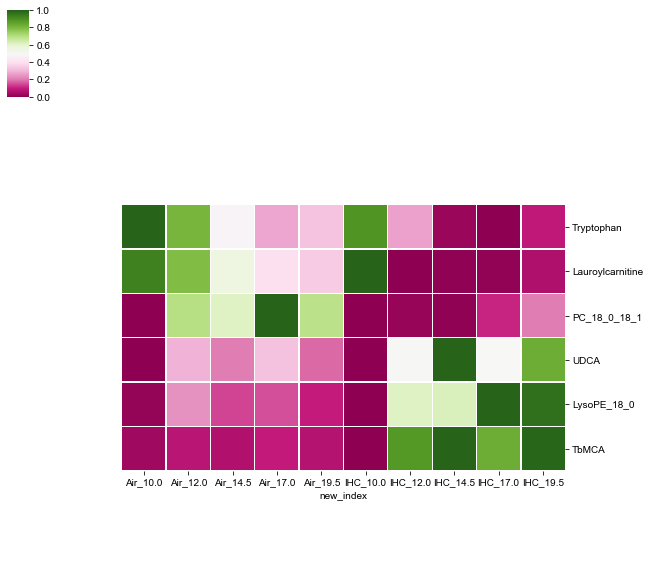

In [128]:
ax = sns.clustermap(IHC_hm4.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
#plt.axvline(2, linewidth=3, c='k')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHC_heatmap_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [75]:
ihic_mols_relfreq_renamed = ihic_mols_relfreq.rename(columns={'Tauro-b-muricholic acid': 'TbMCA', 
                                                                               'TRYPTOPHAN': 'Tryptophan', 
                   'Spectral Match to 1-Octadecanoyl-2-octadecenoyl-sn-glycero-3-phosphocholine from NIST14': 'PC_18_0_18_1', 
                   'LAUROYLCARNITINE': 'Lauroylcarnitine', 
                   'Spectral Match to 1-Stearoyl-2-hydroxy-sn-glycero-3-phosphoethanolamine from NIST14': 'LysoPE_18_0', 
                  'Ursodeoxycholic acid': 'UDCA'})

In [77]:
ihic_mols_relfreq_renamed

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units,new_index
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.0
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,Air_10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A42_167_1,0.096047,0.052424,0.018021,0.001966,0.005092,0.001331,0.007512,0.054160,0.000417,0.082060,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IC_10.0
A42_168_1,0.172175,0.033883,0.011932,0.002903,0.015595,0.006075,0.022776,0.044525,0.000000,0.075559,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IC_10.0
A41_166_1,0.050670,0.031877,0.011619,0.001850,0.005911,0.002661,0.005536,0.033898,0.000119,0.074737,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IC_10.0
A43_174_1,0.100469,0.019256,0.009126,0.000658,0.003956,0.001544,0.018715,0.049623,0.000246,0.076707,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IC_10.0


In [92]:
ihic_mols_relfreq_renamed['new_index'] = ihic_mols_relfreq_renamed['exposure_type'].astype(str) + '_' + ihic_mols_relfreq_renamed['host_age'].astype(str)

In [98]:
#ihic_mols_relfreq_renamedz = ihic_mols_relfreq_renamed.loc[:, ~ihic_mols_relfreq_renamed.columns.duplicated()]
#ihic_mols_relfreq_renamedz.head()

,"(2Z)-2-[(E)-6-(hydroxymethyl)-2,4,8,10-tetramethyldodec-2-enylidene]-4-methylpentanedioic acid","(4R)-4-((2S,3S,5R,7R,9S,10S,12S,13R,14S,17R)-2,3,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5S,7S,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((5S,7R,8R,9S,10S,12S,13R,17R)-7,12-dihydroxy-10,13-dimethyl-3-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4S,5Z,6S)-4-(2-methoxy-2-oxoethyl)-5-[2-[(E)-3-phenylprop-2-enoyl]oxyethylidene]-6-[(2S,3R,4S,5S,6R)-3,4,5-trihydroxy-6-(hydroxymethyl)oxan-2-yl]oxy-4H-pyran-3-carboxylic acid",...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_type,scientific_name,sex,taxon_id,title,weight_units,new_index
A36_144_2,0.375385,0.069536,0.031704,0.012435,0.047391,0.014178,0.121005,0.144555,0.000071,0.002206,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_145_2,0.304815,0.063607,0.026294,0.021616,0.030888,0.028128,0.105111,0.064325,0.000106,0.001496,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_146_2,0.318998,0.074815,0.033500,0.014315,0.027868,0.007893,0.109808,0.103266,0.000121,0.001146,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.5
A36_145_1,0.123710,0.040281,0.020029,0.003910,0.021421,0.002388,0.027319,0.053149,0.000000,0.051469,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,IH_10.0
A35_139_1,0.099870,0.011379,0.001343,0.002126,0.002883,0.015178,0.019089,0.028164,0.000000,0.062247,...,UCSDMI,True,11829.0,stool,mouse gut metagenome,male,410661.0,10 week IH and IC,g,Air_10.0


In [111]:
molelist3 = molelist
molelist3.append('new_index')
IHIC_hm = ihic_mols_relfreq_renamedz[molelist3].copy()
IHIC_hm.set_index('new_index', inplace=True)
IHIC_hm.head()

,TbMCA,Tryptophan,PC_18_0_18_1,Lauroylcarnitine,LysoPE_18_0,UDCA
new_index,,,,,,
IH_10.5,0.046724,0.405021,0.000276,0.097023,0.002162,0.002040
IH_10.5,0.025142,0.221454,0.000508,0.037889,0.009049,0.001904
IH_10.5,0.015552,0.089688,0.011301,0.017918,0.001033,0.005439
IH_10.0,0.053737,0.105805,0.000073,0.011132,0.003216,0.000458
Air_10.0,0.021832,0.316253,0.006589,0.032298,0.000000,0.000105


In [112]:
IHIC_hm2 = IHIC_hm.groupby(IHIC_hm.index, axis=0).mean()
IHIC_hm2

,TbMCA,Tryptophan,PC_18_0_18_1,Lauroylcarnitine,LysoPE_18_0,UDCA
new_index,,,,,,
Air_10.0,0.024174,0.485769,0.040674,0.039926,0.013384,0.002825
Air_10.5,0.060668,0.471320,0.037219,0.026981,0.120645,0.005682
Air_12.5,0.060833,0.286285,0.036923,0.087682,0.261107,0.006098
Air_15.0,0.043815,0.331550,0.039255,0.170177,0.319031,0.007543
Air_17.5,0.051420,0.317805,0.045683,0.123010,0.275649,0.004287
Air_20.0,0.085663,0.389169,0.036487,0.111550,0.289926,0.004035
IC_10.0,0.020284,0.313712,0.054420,0.031126,0.005250,0.004011
IC_10.5,0.035829,0.359290,0.073149,0.040718,0.275826,0.006128
IC_12.5,0.073625,0.198642,0.059019,0.015684,0.362718,0.010837


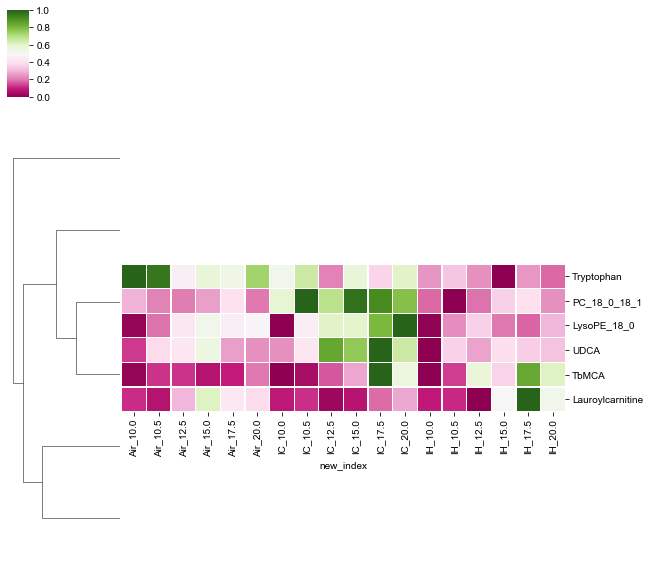

In [113]:
ax1 = sns.clustermap(IHIC_hm2.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [129]:
IHIC_hm3 = IHIC_hm2[norder]
IHIC_hm3

,Tryptophan,Lauroylcarnitine,PC_18_0_18_1,UDCA,LysoPE_18_0,TbMCA
new_index,,,,,,
Air_10.0,0.485769,0.039926,0.040674,0.002825,0.013384,0.024174
Air_10.5,0.471320,0.026981,0.037219,0.005682,0.120645,0.060668
Air_12.5,0.286285,0.087682,0.036923,0.006098,0.261107,0.060833
Air_15.0,0.331550,0.170177,0.039255,0.007543,0.319031,0.043815
Air_17.5,0.317805,0.123010,0.045683,0.004287,0.275649,0.051420
Air_20.0,0.389169,0.111550,0.036487,0.004035,0.289926,0.085663
IC_10.0,0.313712,0.031126,0.054420,0.004011,0.005250,0.020284
IC_10.5,0.359290,0.040718,0.073149,0.006128,0.275826,0.035829
IC_12.5,0.198642,0.015684,0.059019,0.010837,0.362718,0.073625


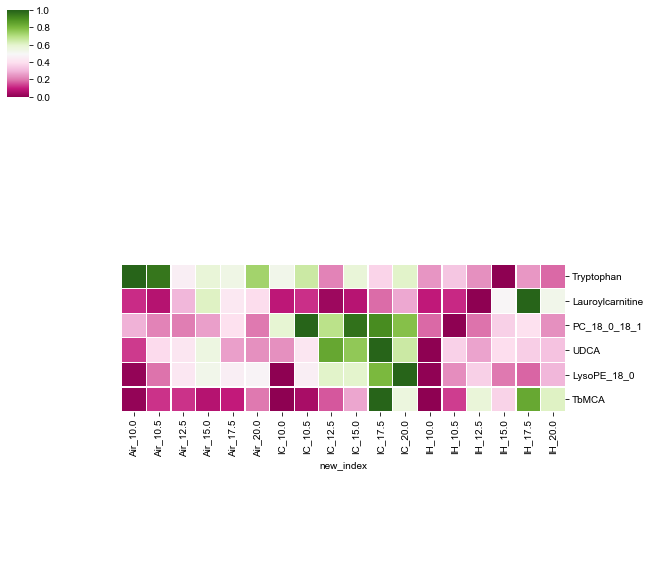

In [132]:
ax1 = sns.clustermap(IHIC_hm3.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHIC_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [114]:
theIH = IHIC_hm2.filter(regex='IH', axis=0)
theAir = IHIC_hm2.filter(regex='Air', axis=0)
AirIH = pd.concat([theAir, theIH])

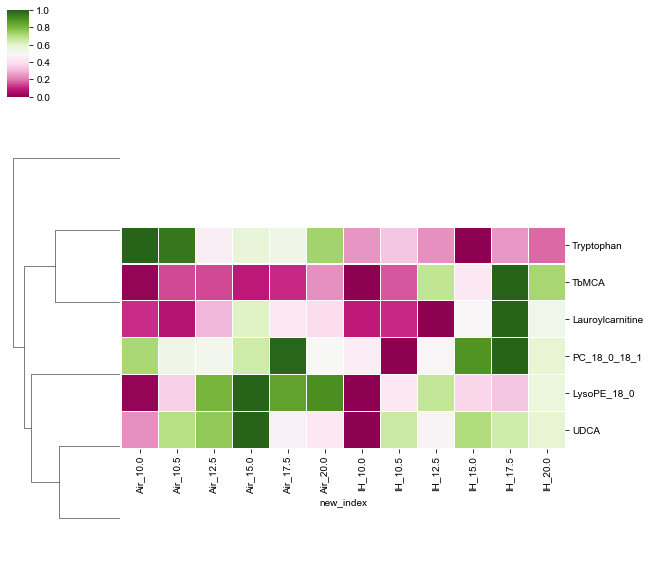

In [119]:
ax1 = sns.clustermap(AirIH.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [131]:
AirIH2 = AirIH[norder]
AirIH2

,Tryptophan,Lauroylcarnitine,PC_18_0_18_1,UDCA,LysoPE_18_0,TbMCA
new_index,,,,,,
Air_10.0,0.485769,0.039926,0.040674,0.002825,0.013384,0.024174
Air_10.5,0.471320,0.026981,0.037219,0.005682,0.120645,0.060668
Air_12.5,0.286285,0.087682,0.036923,0.006098,0.261107,0.060833
Air_15.0,0.331550,0.170177,0.039255,0.007543,0.319031,0.043815
Air_17.5,0.317805,0.123010,0.045683,0.004287,0.275649,0.051420
Air_20.0,0.389169,0.111550,0.036487,0.004035,0.289926,0.085663
IH_10.0,0.209125,0.032274,0.035596,0.001325,0.009193,0.020386
IH_10.5,0.242504,0.038299,0.027123,0.005410,0.144054,0.065008
IH_12.5,0.205917,0.008174,0.036245,0.004361,0.218265,0.205153


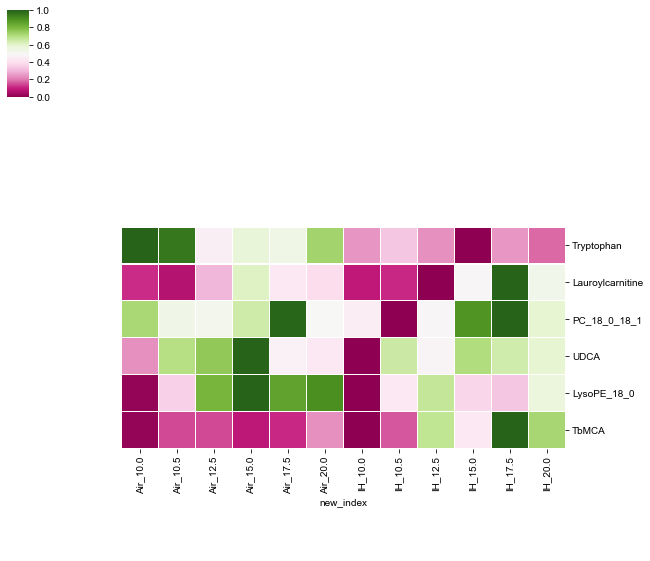

In [133]:
ax1 = sns.clustermap(AirIH2.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/IHAir_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [120]:
theIC = IHIC_hm2.filter(regex='IC', axis=0)
AirIC = pd.concat([theAir, theIC])

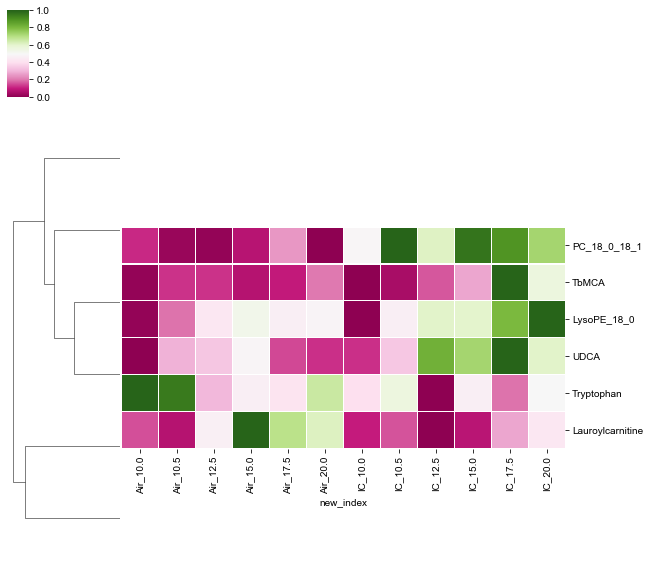

In [121]:
ax1 = sns.clustermap(AirIC.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/ICAir_heatmap_all.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean

In [134]:
AirIC2 = AirIC[norder]
AirIC2

,Tryptophan,Lauroylcarnitine,PC_18_0_18_1,UDCA,LysoPE_18_0,TbMCA
new_index,,,,,,
Air_10.0,0.485769,0.039926,0.040674,0.002825,0.013384,0.024174
Air_10.5,0.471320,0.026981,0.037219,0.005682,0.120645,0.060668
Air_12.5,0.286285,0.087682,0.036923,0.006098,0.261107,0.060833
Air_15.0,0.331550,0.170177,0.039255,0.007543,0.319031,0.043815
Air_17.5,0.317805,0.123010,0.045683,0.004287,0.275649,0.051420
Air_20.0,0.389169,0.111550,0.036487,0.004035,0.289926,0.085663
IC_10.0,0.313712,0.031126,0.054420,0.004011,0.005250,0.020284
IC_10.5,0.359290,0.040718,0.073149,0.006128,0.275826,0.035829
IC_12.5,0.198642,0.015684,0.059019,0.010837,0.362718,0.073625


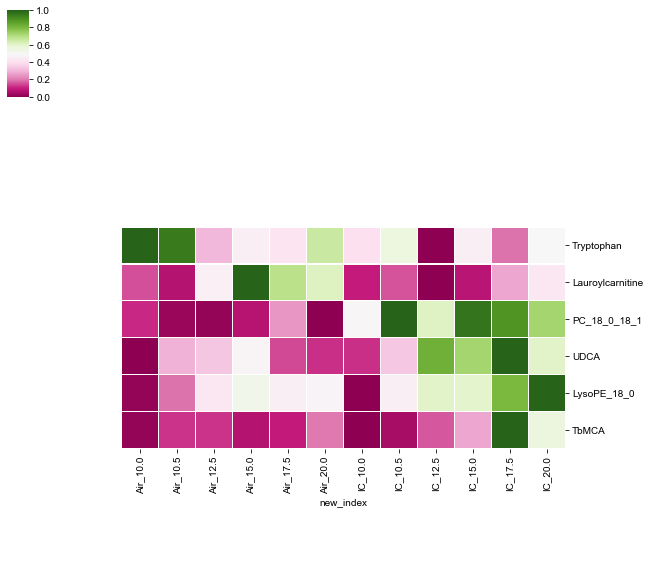

In [136]:
ax1 = sns.clustermap(AirIC2.T, standard_scale=0, cmap="PiYG", linewidths=0.3, 
               col_cluster=False, row_cluster=False, square=True)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/ICAir_heatmap_all_set.svg', dpi=300, bbox_inches="tight")
#standard scale subtracts the minimul and divides every row by maximum
#z_score for this data would be weird because it would take a mean of a mean